# Program Info

- This program was written by: Luigi Spreafico

- This program aims to show the analitical solution the one-dimensional quantum mechanical problem of the infinite potential well and compare to a numerical solution.


# The modules

In [85]:

import numpy as np

import matplotlib.pyplot as plt

from numpy import linalg as LA


In [86]:
# ----- ===== ----- ===== ----- ===== ----- ===== ----- ===== -----

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    'font.size': 12})

writing_font = {'fontname':'Times New Roman'}

# ----- ===== ----- ===== ----- ===== ----- ===== ----- ===== -----

# Numerical Function (numerical methods)



## Numerical Differentiation - Three-Point



Given:
- an array with $N$ points of our function; where this array begins at $0$ and goes up to (including) $n$.
- where the $\Delta x$ equal between all points.

For the:
- most left point ($i = 0$; $i$ being the index of the array): $$ \left. \frac{d f}{d x} \right|_{x=x_{i}} = \frac{ - 3 f \left( x_{i} \right) + 4 f \left( x_{i+1} \right) - f \left( x_{i+2} \right) }{2 \Delta x} $$

- most right point ($i = n$; $i$ being the index of the array): $$ \left. \frac{d f}{d x} \right|_{x=x_{i}} = \frac{ f \left( x_{i-2} \right) - 4 f \left( x_{i-1} \right) + 3 f \left( x_{i} \right) }{2 \Delta x} $$

- all other points: $$ \left. \frac{d f}{d x} \right|_{x=x_{i}} = \frac{ - f \left( x_{i-1} \right) + f \left( x_{i+1} \right) }{2 \Delta x} $$


In [87]:

# ND_O1_3p = numerical differentiation first order derivative with 3 points
def ND_O1_3p(the_fs,delta_x):
    the_array_fs = np.array(the_fs)
    f_dev_1_numeric = np.empty(the_array_fs.shape)
    for i_1 in range(f_dev_1_numeric.shape[0]):
        if(i_1==0):
            f_dev_1_numeric[i_1] = ( -3.0*the_array_fs[i_1]+4.0*the_array_fs[i_1+1]-the_array_fs[i_1+2] )/(2.0*delta_x)
        elif(i_1==(f_dev_1_numeric.shape[0]-1)):
            f_dev_1_numeric[i_1] = ( the_array_fs[i_1-2]-4.0*the_array_fs[i_1-1]+3.0*the_array_fs[i_1] )/(2.0*delta_x)
        else:
            f_dev_1_numeric[i_1] = ( -the_array_fs[i_1-1]+the_array_fs[i_1+1] )/(2.0*delta_x)
    return f_dev_1_numeric


In [88]:

# ND_ON_3p = numerical differentiation N order derivative with 3 points
def ND_ON_3p(the_fs,delta_x,n):
    the_array_fs = np.array(the_fs)
    for i_n in range(n):
        f_dev_1_numeric = np.empty(the_array_fs.shape)
        for i_1 in range(f_dev_1_numeric.shape[0]):
            if(i_1==0):
                f_dev_1_numeric[i_1] = ( -3.0*the_array_fs[i_1]+4.0*the_array_fs[i_1+1]-the_array_fs[i_1+2] )/(2.0*delta_x)
            elif(i_1==(f_dev_1_numeric.shape[0]-1)):
                f_dev_1_numeric[i_1] = ( the_array_fs[i_1-2]-4.0*the_array_fs[i_1-1]+3.0*the_array_fs[i_1] )/(2.0*delta_x)
            else:
                f_dev_1_numeric[i_1] = ( -the_array_fs[i_1-1]+the_array_fs[i_1+1] )/(2.0*delta_x)
        the_array_fs = f_dev_1_numeric[:]
    return f_dev_1_numeric


## Numerical Integration - The Trapezoidal Rule

In [89]:

# T_NI_DxEqual - Trapezoidal Numerical Integration considering a delta_x equal between all points.
def T_NI_DxEqual(the_fs,delta_x):
    the_halfs = np.array([0,-1])
    the_new_fs = the_fs[:]
    # the_new_fs[0] = the_new_fs[0]/2.0
    # the_new_fs[-1] = the_new_fs[-1]/2.0
    the_new_fs[the_halfs] = the_new_fs[the_halfs]/2.0
    return delta_x*np.sum(the_new_fs)


In [90]:

# T_NI_DxDifferent - Trapezoidal Numerical Integration considering a delta_x different between all points.
def T_NI_DxDifferent(the_fs,the_xs):
    the_integral = 0.0
    for i_1 in range(len(the_fs)-1):
        the_integral+=(the_fs[i_1]+the_fs[i_1+1])*(the_xs[i_1+1]-the_xs[i_1])
    the_integral*=0.5
    return the_integral


# The Problem - Quantum Mechanics - infinite potential well


\begin{equation*}
V \left( x \right)
=
\left\{
\begin{split}
&
0
;\;\;\;\;\;
x
\in
\left[ 0 , a \right]
\\&
+ \infty
;\;\;\;\;\;
x
\in
\left( - \infty , 0 \right)
\cup
\left( a , + \infty \right)
\end{split}
\right.
\end{equation*}

<!-- \begin{equation*}
V \left( x \right)
=
\left\{
\begin{split}
&
0
\;\;\;
\left( 0 \leqslant x \leqslant a \right)
\\&
\infty
\;\;\;
\left( x < 0 \vee x > a \right)
\end{split}
\right.
\end{equation*} -->

<h1 style='text-align: center;'> <img src="the_infinite_well.png" width="400"> </h1>

Therefore:

- For $ x \in \left( - \infty , 0 \right) \cup \left( a , \infty \right) $: $\psi \left( x \right) = 0$; from which we have the boundary conditions:

\begin{equation*}
\left\{
\begin{split}
&
\psi \left( 0 \right) = 0
\\&
\psi \left( a \right) = 0
\end{split}
\right.
\end{equation*}

- For $ x \in \left[ 0 , a \right] $:

\begin{equation*}
-
\frac{\hbar^2}{2 m}
\frac{d^2 \psi}{d x^2}
=
E
\psi
\end{equation*}

\begin{equation*}
k
\equiv
\frac{\sqrt{2 m E}}{\hbar}
\end{equation*}

\begin{equation*}
\frac{d^2 \psi}{d x^2}
=
-
k
\psi
\end{equation*}



In [91]:

a = 1.0

hbar = 1.0

m = 1.0


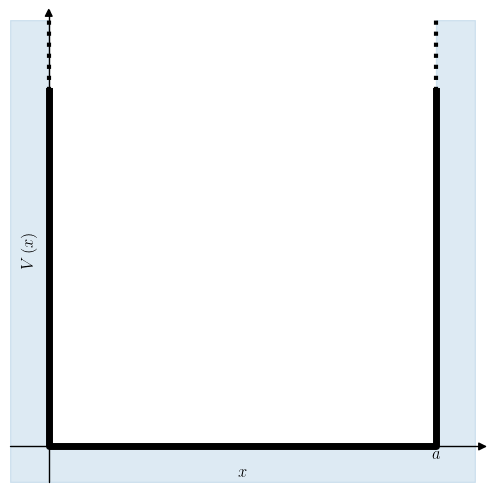

In [92]:

# Ilustration of the well

from mpl_toolkits.axisartist.axislines import AxesZero

fig = plt.figure()
ax = fig.add_subplot(axes_class=AxesZero)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

my_xticks = [r'', r'$a$']
# my_xticks = [r'$0$', r'$a$']
my_xticks_values = [0.0,a]
ax.set_xticks(my_xticks_values)
ax.set_xticklabels(my_xticks)

ax.set_yticks([])

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$V \left( x \right)$', ha='left', va = 'top')

# ax.yaxis.set_label_coords(-0.1,1.1)

the_max_y = 1.2
the_min_y = -0.1

ax.set_ylim(the_min_y,the_max_y)
ax.set_xlim(-0.1,1.1*a)

ax.plot([0.0,0.0,a,a], [1.0,0.0,0.0,1.0], '-k', linewidth=5)
ax.plot([0.0,0.0], [1.0,the_max_y], ':k', linewidth=3)
ax.plot([a,a], [1.0,the_max_y], ':k', linewidth=3)

y1 = np.array([the_max_y,the_max_y,0.0,0.0,the_max_y,the_max_y])
y2 = np.array([the_min_y,the_min_y,the_min_y,the_min_y,the_min_y,the_min_y])
ax.fill_between([-0.1,0.0,0.0,1.0*a,1.0*a,1.1*a], y1, y2, where=(y1 > y2), color='C0', alpha=0.15)

set_size_inches_x = 6.0
set_size_inches_y = 6.0
fig.set_size_inches(set_size_inches_x, set_size_inches_y)

file_name = 'the_infinite_well.pdf'
fig.savefig(file_name,bbox_inches='tight', dpi = 500)

file_name = 'the_infinite_well.png'
fig.savefig(file_name,bbox_inches='tight', dpi = 500)

plt.show()


# Analitical Solution





\begin{equation*}
\psi \left( x \right)
=
A
\sin{\left( k x \right)}
+
B
\cos{\left( k x \right)}
\end{equation*}

Using the boundary conditions:

- $\psi \left( 0 \right) = 0$:

\begin{equation*}
\psi \left( 0 \right)
=
A
\sin{\left( 0 \right)}
+
B
\cos{\left( 0 \right)}
=
B
=
0
\end{equation*}

\begin{equation*}
\therefore
\psi \left( x \right)
=
A
\sin{\left( k x \right)}
\end{equation*}

- $\psi \left( a \right) = 0$:

\begin{equation*}
\psi \left( a \right)
=
A
\sin{\left( k a \right)}
=
0
\end{equation*}

Instead of $A = 0$, we can have:

\begin{equation*}
k a
=
0, \pm \pi, \pm 2 \pi, 3 \pm \pi, \pm 4 \pi, \ldots
\end{equation*}

So that:

\begin{equation*}
k
=
\frac{\pi n}{a}
;\;\;\;\;\;
n = 1, 2, 3, 4, \ldots
\end{equation*}

- Obs. 1: we do not need $n=0$ since we will have $\sin{\left( 0 \right)}$, which is $0$ and will not add anything valuable.

- Obs. 2: we do not need $n$ negative (like $n=-1,-2,\dots$) since we will have $\sin{\left( - \theta \right)} = -\sin{\left( \theta \right)}$, which is not adding anything new.

So, we have:

\begin{equation*}
\psi \left( x \right)
=
A
\sin{\left( k_n x \right)}
;\;\;\;
k_n = \frac{\pi n}{a}
;\;\;\;
n = 1, 2, 3, 4, \ldots
\end{equation*}

To fing $A$ let's normalize this function:

\begin{equation*}
\int_{- \infty}^{\infty}{
\psi^* \left( x \right)
\psi \left( x \right)
} dx
=
1
\end{equation*}

\begin{equation*}
\begin{split}
\int_{- \infty}^{\infty}{
\psi^* \left( x \right)
\psi \left( x \right)
} dx
&
=
\int_{-\infty}^{0}{
0
} dx
+
\int_{0}^{a}{
\left| A \right|^2
\sin^2{\left( k_n x \right)}
} dx
+
\int_{a}^{\infty}{
0
} dx
\\&
=
\left| A \right|^2
\int_{0}^{a}{
\frac{
1
-
\cos{\left( 2 k_n x \right)}
}{2}
} dx
\\&
=
\frac{\left| A \right|^2}{2}
\left[
x
-
\frac{\sin{\left( 2 k_n x \right)}}{2 k_n}
\right]_{0}^{a}
\\&
=
\frac{\left| A \right|^2}{2}
\left[
\left(
a
-
\frac{\sin{\left( 2 k_n a \right)}}{2 k_n}
\right)
-
\left(
0
-
\frac{\sin{\left( 0 \right)}}{2 k_n}
\right)
\right]
\\&
=
\frac{\left| A \right|^2}{2}
\left[
a
-
\frac{\sin{\left( 2 \pi n \right)}}{2 k_n}
\right]
\\&
=
\frac{a}{2}
\left| A \right|^2
=
1
\end{split}
\end{equation*}

\begin{equation*}
\therefore
\left| A \right|^2
=
\frac{2}{a}
\end{equation*}

Even though there would be other options of $A$, let's go for the simplest.

\begin{equation*}
\psi \left( x \right)
=
\sqrt{\frac{2}{a}}
\sin{\left( k_n x \right)}
;\;\;\;
k_n = \frac{\pi n}{a}
;\;\;\;
n = 1, 2, 3, 4, \ldots
\end{equation*}

Obs.: we also have that:

\begin{equation*}
E_n
=
\frac{\hbar^2 k_n^2}{2 m}
=
\frac{\hbar^2 \pi^2 n^2}{2 m a^2}
;\;\;\;
n = 1, 2, 3, 4, \ldots
\end{equation*}






In [93]:

def the_analitical_solution_psi(x,n,a=1.0):
    return np.sqrt(2.0/a)*np.sin((n*np.pi/a)*x)


In [94]:

x_initial = 0.0
x_final = a
# number_of_points = 100
number_of_points = 200
# number_of_points = 400
the_N = number_of_points

the_xs = np.linspace(x_initial,x_final,num=number_of_points)

the_ys = []

the_ns = np.array([i_1 for i_1 in range(1,5)])

for the_n in the_ns:
    the_ys.append(the_analitical_solution_psi(x=the_xs,n=the_n,a=1.0))

the_ys = np.array(the_ys)

the_ys_squared = np.power(the_ys,2.0)


In [95]:

for i_n,the_n in enumerate(the_ns):
    the_normalization_number = np.trapz(the_ys_squared[i_n],the_xs)
    print(f'the_normalization_number = {the_normalization_number}')


the_normalization_number = 1.0
the_normalization_number = 1.0
the_normalization_number = 1.0
the_normalization_number = 1.0000000000000002


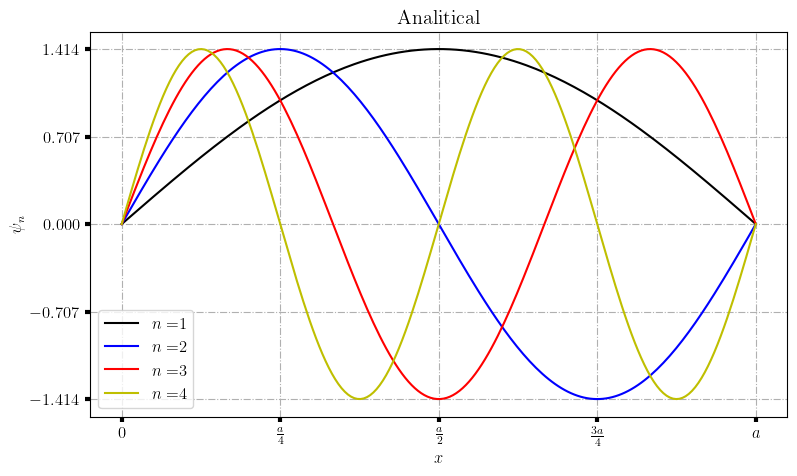

In [96]:

set_size_inches_x = 9.0
set_size_inches_y = 5.0
file_name = f'some_solutions_analitical_{1}_{the_ns[-1]}.pdf'

the_styles = ['-k','-b','-r','-y']

number_of_ticks_x = 4
number_of_ticks_y = 4

graph_x_label = r'$x$'
graph_y_label = r'$\psi_n$'

# =============================================================================================================================

fig, ax = plt.subplots()

for i_n,the_n in enumerate(the_ns):
    ax.plot(the_xs,the_ys[i_n], the_styles[i_n], label=r'$n=$'+str(the_n))
ax.legend(loc=3)

my_xticks = [r'$0$', r'$\frac{a}{4}$', r'$\frac{a}{2}$', r'$\frac{3a}{4}$', r'$a$']
my_xticks_values = [0.0,0.25*a,0.50*a,0.75*a,1.0*a]
ax.set_xticks(my_xticks_values)
ax.set_xticklabels(my_xticks)

max_x_values = np.max(the_xs)
min_x_values = np.min(the_xs)
xticks_delta = ( max_x_values - min_x_values ) / number_of_ticks_x
# ax.set_xticks(np.arange(min_x_values, max_x_values+xticks_delta, xticks_delta))

max_y_values = np.max(the_ys)
min_y_values = np.min(the_ys)
yticks_delta = ( max_y_values - min_y_values ) / number_of_ticks_y
ax.set_yticks(np.arange(min_y_values, max_y_values+yticks_delta, yticks_delta))

range_x_values = max_x_values - min_x_values
range_y_values = max_y_values - min_y_values

graph_title = 'Analitical'
ax.set_title(graph_title)
ax.set_xlabel(graph_x_label)
ax.set_ylabel(graph_y_label)

ax.set_xlim(min_x_values-(range_x_values/20.0), max_x_values+(range_x_values/20.0))
ax.set_ylim(min_y_values-(range_y_values/20.0), max_y_values+(range_y_values/20.0))

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='k', labelsize='medium', width=3)

fig.set_size_inches(set_size_inches_x, set_size_inches_y)
fig.savefig(file_name,bbox_inches='tight', dpi = 100)

plt.show()


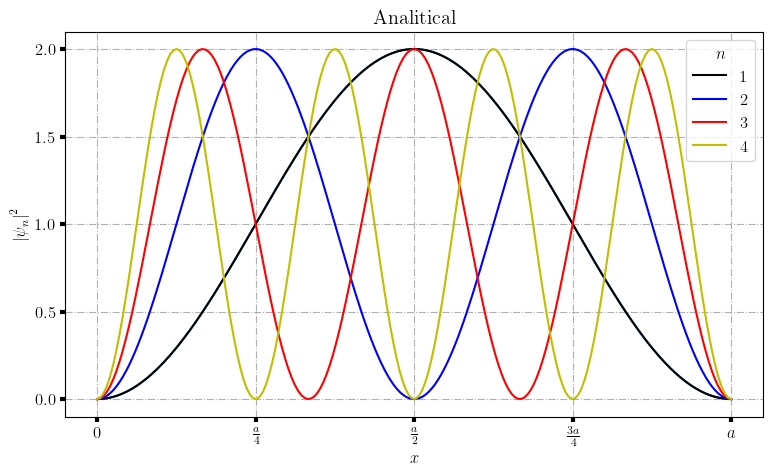

In [97]:

set_size_inches_x = 9.0
set_size_inches_y = 5.0
file_name = f'some_solutions_analitical_PsiSquared_{1}_{the_ns[-1]}.pdf'

the_styles = ['-k','-b','-r','-y']

number_of_ticks_x = 4
number_of_ticks_y = 4

graph_x_label = r'$x$'
graph_y_label = r'$\left| \psi_n \right|^2$'

# =============================================================================================================================

fig, ax = plt.subplots()

ax.plot(the_xs,the_ys_squared[0])

for i_n,the_n in enumerate(the_ns):
    ax.plot(the_xs,the_ys_squared[i_n], the_styles[i_n], label=str(the_n))
ax.legend(title=r'$n$',loc=1)

my_xticks = [r'$0$', r'$\frac{a}{4}$', r'$\frac{a}{2}$', r'$\frac{3a}{4}$', r'$a$']
my_xticks_values = [0.0,0.25*a,0.50*a,0.75*a,1.0*a]
ax.set_xticks(my_xticks_values)
ax.set_xticklabels(my_xticks)

max_x_values = np.max(the_xs)
min_x_values = np.min(the_xs)
xticks_delta = ( max_x_values - min_x_values ) / number_of_ticks_x
# ax.set_xticks(np.arange(min_x_values, max_x_values+xticks_delta, xticks_delta))

max_y_values = np.max(the_ys_squared)
min_y_values = np.min(the_ys_squared)
yticks_delta = ( max_y_values - min_y_values ) / number_of_ticks_y
ax.set_yticks(np.arange(min_y_values, max_y_values+yticks_delta, yticks_delta))

range_x_values = max_x_values - min_x_values
range_y_values = max_y_values - min_y_values

graph_title = 'Analitical'
ax.set_title(graph_title)
ax.set_xlabel(graph_x_label)
ax.set_ylabel(graph_y_label)

ax.set_xlim(min_x_values-(range_x_values/20.0), max_x_values+(range_x_values/20.0))
ax.set_ylim(min_y_values-(range_y_values/20.0), max_y_values+(range_y_values/20.0))

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='k', labelsize='medium', width=3)

fig.set_size_inches(set_size_inches_x, set_size_inches_y)
fig.savefig(file_name,bbox_inches='tight', dpi = 100)

plt.show()


# Numerical Solution





## Approximation 1

For the numerical approximation of the second derivative we use:

\begin{equation*}
\left.
\frac{d^2 \psi}{d x^2}
\right|_{x=x_{i}}
=
\frac{
\psi \left( x_{i+1} \right)
- 2
\psi \left( x_{i} \right)
+
\psi \left( x_{i-1} \right)
}{\left( \Delta x \right)^2}
\end{equation*}

So that we have:

\begin{equation*}
\frac{
\psi \left( x_{i+1} \right)
- 2
\psi \left( x_{i} \right)
+
\psi \left( x_{i-1} \right)
}{\left( \Delta x \right)^2}
=
-
k_n
\psi \left( x_{i} \right)
\end{equation*}


### Obtaining the eigenfunctions/eigenvectors

Let's say we have $N+1$ points. We begin at $0$ and go until (including) $N$.

We have:

- $x_0 = 0$

- $x_N = a$

And:

- $\psi \left( x_0 \right) = 0$

- $\psi \left( x_N \right) = 0$

For $i=1$ until $i=N-1$ we have:

- For $i=1$:

\begin{equation*}
\frac{
\psi \left( x_{2} \right)
- 2
\psi \left( x_{1} \right)
+
\psi \left( x_{0} \right)
}{\left( \Delta x \right)^2}
=
-
k_n
\psi \left( x_{1} \right)
\end{equation*}

\begin{equation*}
\therefore
\frac{
\psi \left( x_{2} \right)
- 2
\psi \left( x_{1} \right)
}{\left( \Delta x \right)^2}
=
-
k_n
\psi \left( x_{1} \right)
\end{equation*}

- For $i=N-1$:

\begin{equation*}
\frac{
\psi \left( x_{N} \right)
- 2
\psi \left( x_{N-1} \right)
+
\psi \left( x_{N-2} \right)
}{\left( \Delta x \right)^2}
=
-
k_n
\psi \left( x_{N-1} \right)
\end{equation*}

\begin{equation*}
\therefore
\frac{
- 2
\psi \left( x_{N-1} \right)
+
\psi \left( x_{N-2} \right)
}{\left( \Delta x \right)^2}
=
-
k_n
\psi \left( x_{N-1} \right)
\end{equation*}

- For other cases $i$:

\begin{equation*}
\frac{
\psi \left( x_{i+1} \right)
- 2
\psi \left( x_{i} \right)
+
\psi \left( x_{i-1} \right)
}{\left( \Delta x \right)^2}
=
-
k_n
\psi \left( x_{i} \right)
\end{equation*}

In a way that we have:

\begin{equation*}
\frac{1}{\left( \Delta x \right)^2}
\boldsymbol{A}
\boldsymbol{\psi}
=
k_n
\boldsymbol{\psi}
\end{equation*}

Where:

\begin{equation*}
\boldsymbol{\psi}
=
\begin{bmatrix}
\psi_{1}\\
\psi_{2}\\
\vdots\\
\psi_{i-1}\\
\psi_{i}\\
\psi_{i+1}\\
\vdots\\
\psi_{N-2}\\
\psi_{N-1}
\end{bmatrix}
\end{equation*}

\begin{equation*}
\boldsymbol{A}
=
\begin{bmatrix}
2 & -1 & 0 \\
-1 & 2 & -1\\
 & & & & \ddots\\
 & & & & & & -1 & 2 & -1 & 0 & 0\\
 & & & & & & 0 & -1 & 2 & -1 & 0\\
 & & & & & & 0 & 0 & -1 & 2 & -1\\
 & & & & & & & & & & & & \ddots\\
 & & & & & & & & & & & & & & -1 & 2 & -1\\
 & & & & & & & & & & & & & & 0 & -1 & 2
\end{bmatrix}
\end{equation*}

In a way that we have an eigenvalue/eigenvector problem, where the eigenvectors are our eigenfunctions.

Obs.: we can just solve the eigenvalue/eigenvector problem without dividing by $\left( \Delta x \right)^2$ the matrix $\boldsymbol{A}$, this is the best thing to do, since it will make a better problem computationally. Also, we will normalize the eigenfunctions after anyway. The only thing to be aware is that we have $\Delta x$ the same between any $i$ and $i+1$ or $i$ and $i-1$.





In [98]:

def making_the_matrix_A_1(N=5,a=1.0):
    the_delta_x = a/N
    # the_delta_x = 1.0
    the_N = N-2
    the_sign = -1.0
    # the_sign = +1.0
    A = np.zeros((the_N,the_N))
    for i_0 in range(the_N):
        A[i_0,i_0] += -2.0*the_sign/np.power(the_delta_x,2.0)
        if((i_0!=0)and(i_0!=(the_N-1))):
            A[i_0,i_0-1] += 1.0*the_sign/np.power(the_delta_x,2.0)
            A[i_0,i_0+1] += 1.0*the_sign/np.power(the_delta_x,2.0)
        elif(i_0==0):
            A[i_0,i_0+1] += 1.0*the_sign/np.power(the_delta_x,2.0)
        elif(i_0==(the_N-1)):
            A[i_0,i_0-1] += 1.0*the_sign/np.power(the_delta_x,2.0)
    return A


In [99]:

# Testing

print(making_the_matrix_A_1(N=4))
print(making_the_matrix_A_1(N=5))
print(making_the_matrix_A_1(N=6))
print(making_the_matrix_A_1(N=7))


[[ 32. -16.]
 [-16.  32.]]
[[ 50. -25.   0.]
 [-25.  50. -25.]
 [  0. -25.  50.]]
[[ 72. -36.   0.   0.]
 [-36.  72. -36.   0.]
 [  0. -36.  72. -36.]
 [  0.   0. -36.  72.]]
[[ 98. -49.   0.   0.   0.]
 [-49.  98. -49.   0.   0.]
 [  0. -49.  98. -49.   0.]
 [  0.   0. -49.  98. -49.]
 [  0.   0.   0. -49.  98.]]


In [100]:

# the_N = 10
# the_N = 20
# the_N = 40
# the_N = 80
# the_N = 100
the_N = 200 # this one
# the_N = 1000
# the_N = 6

the_xs_num = np.linspace(x_initial,x_final,num=the_N)

the_eig = LA.eig(making_the_matrix_A_1(N=the_N))

the_eigva, the_eigve = LA.eig(making_the_matrix_A_1(N=the_N))

# print(f'the_eigva:\n{the_eigva}')
# print(f'the_eigve:\n{the_eigve}')

idx = np.argsort(the_eigva)
the_eigva = the_eigva[idx]
the_eigve = the_eigve[:,idx]

# print(f'the_eigva:\n{the_eigva}')
# print(f'the_eigve:\n{the_eigve}')

solution_N = 4
# solution_N = the_N-2
the_solutions = np.zeros((solution_N,the_N))
the_kns_1 = np.zeros((solution_N,))
for i_1 in range(solution_N):
    # the_solutions[i_1,1:-1] = the_eigve[:,-(i_1+1)]
    the_solutions[i_1,1:-1] = the_eigve[:,i_1]
    the_kns_1[i_1] = np.sqrt(the_eigva[i_1])

the_solutions_squared = np.power(the_solutions,2.0)


In [101]:
the_kns_1

array([ 3.15734676,  6.31449681,  9.47125341, 12.62741991])

In [102]:

# for i_1 in range(solution_N):
#     print()
#     print(50*'-')
#     print(f'i_1 = {i_1}')
#     # print(f'the_eig[0][i_1] = {the_eig[0][i_1]}')
#     plt.plot(the_solutions[i_1,:])
#     plt.title(f'k = {the_eigva[i_1]}')
#     plt.show()



Normailizing the eigenfunctions, we do this to make sure that:

\begin{equation*}
\int_{- \infty}^{+ \infty}{
\psi^* \left( x \right)
\psi \left( x \right)
} dx
=
1
\end{equation*}


In [103]:

# The normalization

for i_1 in range(solution_N):

    print()
    print(50*'-')
    print(f'i_1 = {i_1}')

    the_normalization_number = T_NI_DxEqual(the_solutions_squared[i_1,:],the_xs_num[1]-the_xs_num[0])

    the_sign_number = T_NI_DxEqual(the_solutions[i_1,:],the_xs_num[1]-the_xs_num[0])

    print(f'the_normalization_number = {the_normalization_number}')


    # if(the_sign_number<0):
    if(the_solutions[i_1,2]<0):
        the_solutions[i_1,:] = the_solutions[i_1,:]*(-1.0)

    the_solutions[i_1,:] = the_solutions[i_1,:]/np.sqrt(the_normalization_number)

    the_solutions_squared[i_1,:] = the_solutions_squared[i_1,:]/the_normalization_number

    the_normalization_number = T_NI_DxEqual(the_solutions_squared[i_1,:],the_xs_num[1]-the_xs_num[0])

    print(f'the_normalization_number = {the_normalization_number}')

# the_solutions = np.sqrt(the_solutions_squared)



--------------------------------------------------
i_1 = 0
the_normalization_number = 0.005025125628140703
the_normalization_number = 0.9999999999999998

--------------------------------------------------
i_1 = 1
the_normalization_number = 0.005025125628140703
the_normalization_number = 0.9999999999999999

--------------------------------------------------
i_1 = 2
the_normalization_number = 0.0050251256281407045
the_normalization_number = 1.0

--------------------------------------------------
i_1 = 3
the_normalization_number = 0.005025125628140704
the_normalization_number = 1.0000000000000002


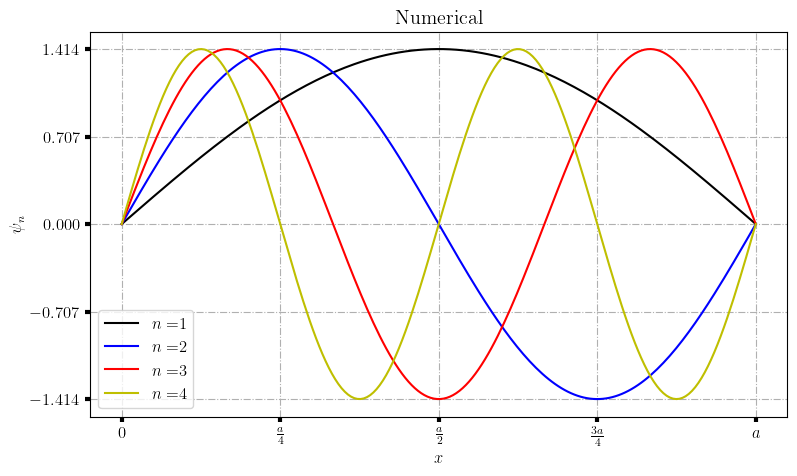

In [104]:

set_size_inches_x = 9.0
set_size_inches_y = 5.0
file_name = f'some_solutions_numerical1_{1}_{4}.pdf'

the_styles = ['-k','-b','-r','-y']

number_of_ticks_x = 4
number_of_ticks_y = 4

graph_x_label = r'$x$'
graph_y_label = r'$\psi_n$'

# =============================================================================================================================

fig, ax = plt.subplots()

for i_n in range(solution_N):
    ax.plot(the_xs_num,the_solutions[i_n,:], the_styles[i_n], label=r'$n=$'+str(i_n+1))
ax.legend(loc=3)

my_xticks = [r'$0$', r'$\frac{a}{4}$', r'$\frac{a}{2}$', r'$\frac{3a}{4}$', r'$a$']
my_xticks_values = [0.0,0.25*a,0.50*a,0.75*a,1.0*a]
ax.set_xticks(my_xticks_values)
ax.set_xticklabels(my_xticks)

max_x_values = np.max(the_xs_num)
min_x_values = np.min(the_xs_num)
xticks_delta = ( max_x_values - min_x_values ) / number_of_ticks_x
# ax.set_xticks(np.arange(min_x_values, max_x_values+xticks_delta, xticks_delta))

max_y_values = np.max(the_solutions)
min_y_values = np.min(the_solutions)
yticks_delta = ( max_y_values - min_y_values ) / number_of_ticks_y
ax.set_yticks(np.arange(min_y_values, max_y_values+yticks_delta, yticks_delta))

range_x_values = max_x_values - min_x_values
range_y_values = max_y_values - min_y_values

graph_title = 'Numerical'
ax.set_title(graph_title)
ax.set_xlabel(graph_x_label)
ax.set_ylabel(graph_y_label)

ax.set_xlim(min_x_values-(range_x_values/20.0), max_x_values+(range_x_values/20.0))
ax.set_ylim(min_y_values-(range_y_values/20.0), max_y_values+(range_y_values/20.0))

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='k', labelsize='medium', width=3)

fig.set_size_inches(set_size_inches_x, set_size_inches_y)
fig.savefig(file_name,bbox_inches='tight', dpi = 100)

plt.show()


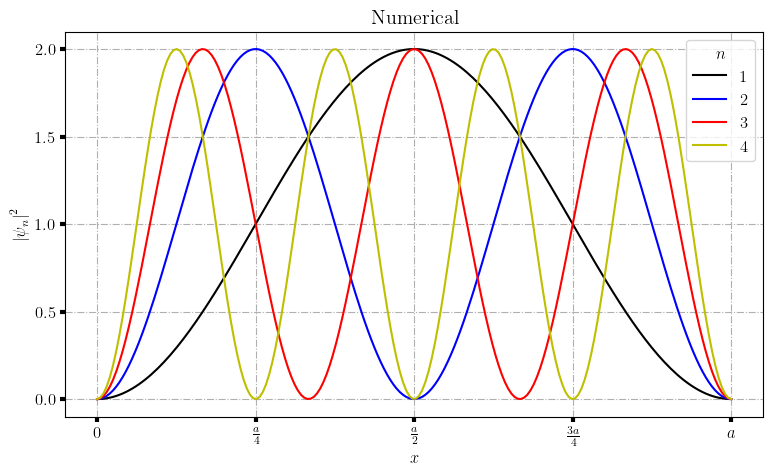

In [105]:

set_size_inches_x = 9.0
set_size_inches_y = 5.0
file_name = f'some_solutions_PsiSquared_numerical1_{1}_{4}.pdf'

the_styles = ['-k','-b','-r','-y']

number_of_ticks_x = 4
number_of_ticks_y = 4

graph_x_label = r'$x$'
graph_y_label = r'$\left| \psi_n \right|^2$'

# =============================================================================================================================

fig, ax = plt.subplots()

for i_n in range(solution_N):
    ax.plot(the_xs_num,the_solutions_squared[i_n,:], the_styles[i_n], label=str(i_n+1))
ax.legend(title=r'$n$',loc=1)

my_xticks = [r'$0$', r'$\frac{a}{4}$', r'$\frac{a}{2}$', r'$\frac{3a}{4}$', r'$a$']
my_xticks_values = [0.0,0.25*a,0.50*a,0.75*a,1.0*a]
ax.set_xticks(my_xticks_values)
ax.set_xticklabels(my_xticks)

max_x_values = np.max(the_xs_num)
min_x_values = np.min(the_xs_num)
xticks_delta = ( max_x_values - min_x_values ) / number_of_ticks_x
# ax.set_xticks(np.arange(min_x_values, max_x_values+xticks_delta, xticks_delta))

max_y_values = np.max(the_solutions_squared)
min_y_values = np.min(the_solutions_squared)
yticks_delta = ( max_y_values - min_y_values ) / number_of_ticks_y
ax.set_yticks(np.arange(min_y_values, max_y_values+yticks_delta, yticks_delta))

range_x_values = max_x_values - min_x_values
range_y_values = max_y_values - min_y_values

graph_title = 'Numerical'
ax.set_title(graph_title)
ax.set_xlabel(graph_x_label)
ax.set_ylabel(graph_y_label)

ax.set_xlim(min_x_values-(range_x_values/20.0), max_x_values+(range_x_values/20.0))
ax.set_ylim(min_y_values-(range_y_values/20.0), max_y_values+(range_y_values/20.0))

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='k', labelsize='medium', width=3)

fig.set_size_inches(set_size_inches_x, set_size_inches_y)
fig.savefig(file_name,bbox_inches='tight', dpi = 100)

plt.show()


### Obtaining the eigenvalues



Remebering from quantum mechanics that the energy may be obtained through:

\begin{equation*}
E_n
=
\int_{- \infty}^{+ \infty}{
\psi^* \left( x \right)
\hat{H}
\psi \left( x \right)
} dx
\end{equation*}

Where $\hat{H}$ is the Hamiltonian operator, which, in this problem is given by:

\begin{equation*}
\hat{H}
=
-
\frac{\hbar^2}{2m}
\frac{d^2}{d x^2}
\end{equation*}

And, we have:

\begin{equation*}
E_n
=
-
\frac{\hbar^2}{2m}
\int_{- \infty}^{+ \infty}{
\psi^* \left( x \right)
\frac{d^2}{d x^2}
\psi \left( x \right)
} dx
\end{equation*}

We also have a relation between $k_n$ and $E_n$:

\begin{equation*}
E_n
=
\frac{\hbar^2 k_n^2}{2 m}
\end{equation*}

\begin{equation*}
\therefore
k_n
=
\sqrt{
\frac{2 m E_n}{\hbar^2}
}
\end{equation*}

So, we can find $k_n$ by doing the following operation:

\begin{equation*}
k_n
=
\sqrt{
-
\int_{- \infty}^{+ \infty}{
\psi^* \left( x \right)
\frac{d^2}{d x^2}
\psi \left( x \right)
} dx
}
\end{equation*}



- First get $\displaystyle \frac{d}{d x} \psi \left( x \right)$ using the values of $\psi \left( x \right)$ obtained from the numerical solution with:
    - Left: $$ \left. \frac{d \psi}{d x} \right|_{x=x_{i}} = \frac{ - 3 \psi \left( x_{i} \right) + 4 \psi \left( x_{i+1} \right) - \psi \left( x_{i+2} \right) }{2 \Delta x} $$
    - Center: $$ \left. \frac{d \psi}{d x} \right|_{x=x_{i}} = \frac{ - \psi \left( x_{i-1} \right) + \psi \left( x_{i+1} \right) }{2 \Delta x} $$
    - Right: $$\left. \frac{d \psi}{d x} \right|_{x=x_{i}} = \frac{ \psi \left( x_{i-2} \right) - 4 \psi \left( x_{i-1} \right) + 3 \psi \left( x_{i} \right) }{2 \Delta x} $$

- Then, we get $\displaystyle \frac{d^2}{d x^2} \psi \left( x \right)$ from the values of $\displaystyle \frac{d}{d x} \psi \left( x \right)$ just calculated using the same approximations (since obtaining $\displaystyle \frac{d^2}{d x^2} \psi \left( x \right)$ is deriving $\displaystyle \frac{d}{d x} \psi \left( x \right)$ a second time).

And now we need to know the $\Delta x$ from the first discretization. This is because we are going to be using the already calculated points to calculate the second derivative.


In [106]:

the_xs_num

the_delta_x = the_xs_num[1]-the_xs_num[0]

the_kns = np.empty(solution_N)

for i_1 in range(solution_N):

    f_dev_2_numeric = ND_ON_3p(the_solutions[i_1,:],the_delta_x,2)

    E_n = -T_NI_DxEqual(the_solutions[i_1,:]*f_dev_2_numeric,the_delta_x)

    the_kns[i_1] = np.sqrt(E_n)

print(f'the_kns\n{the_kns}')


the_kns
[ 3.14146413  6.28215714  9.42130809 12.55814641]


### Comparing the analitical solution with the numerical approximation 1

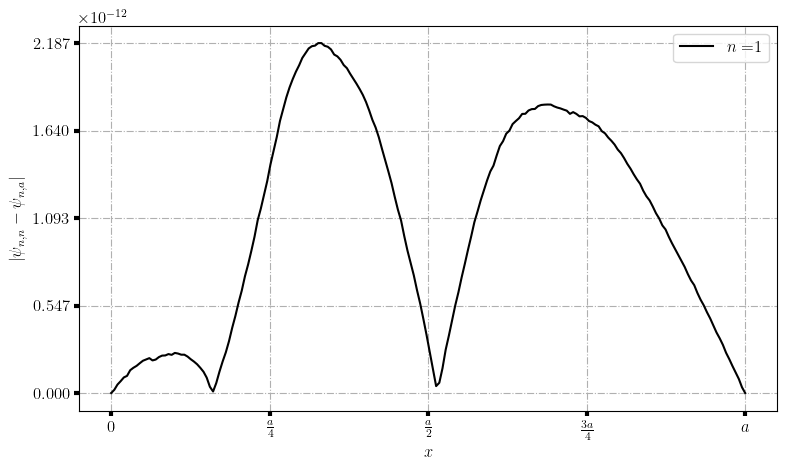

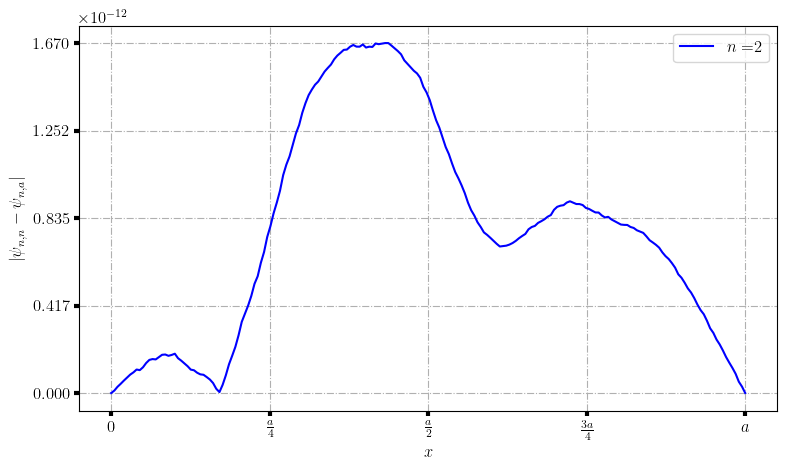

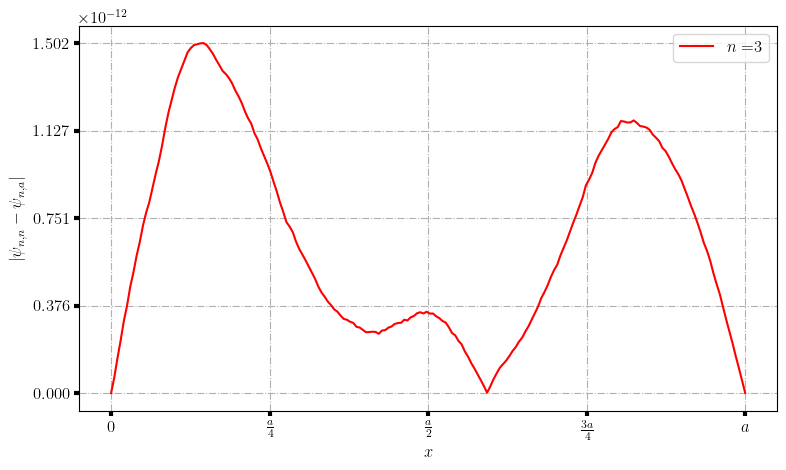

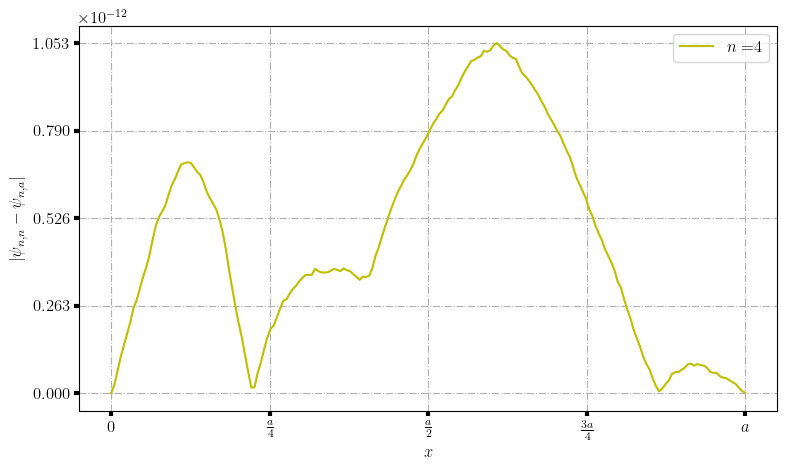

In [107]:

for the_solution in range(solution_N):

    set_size_inches_x = 9.0
    set_size_inches_y = 5.0
    file_name = f'comparison_analitic_num1_wavefunction_{the_solution+1}.pdf'

    the_styles = ['-k','-b','-r','-y']

    number_of_ticks_x = 4
    number_of_ticks_y = 4

    graph_x_label = r'$x$'
    graph_y_label = r'$\left| \psi_{n,n}-\psi_{n,a} \right|$'

    # =============================================================================================================================

    fig, ax = plt.subplots()

    ax.plot(the_xs,np.abs(the_solutions[the_solution,:]-the_ys[the_solution]), the_styles[the_solution], label=r'$n=$'+str(the_solution+1))
    ax.legend(loc=1)

    my_xticks = [r'$0$', r'$\frac{a}{4}$', r'$\frac{a}{2}$', r'$\frac{3a}{4}$', r'$a$']
    my_xticks_values = [0.0,0.25*a,0.50*a,0.75*a,1.0*a]
    ax.set_xticks(my_xticks_values)
    ax.set_xticklabels(my_xticks)

    max_x_values = np.max(the_xs_num)
    min_x_values = np.min(the_xs_num)
    xticks_delta = ( max_x_values - min_x_values ) / number_of_ticks_x
    # ax.set_xticks(np.arange(min_x_values, max_x_values+xticks_delta, xticks_delta))

    max_y_values = np.max(np.abs(the_solutions[the_solution,:]-the_ys[the_solution]))
    min_y_values = np.min(np.abs(the_solutions[the_solution,:]-the_ys[the_solution]))
    yticks_delta = ( max_y_values - min_y_values ) / number_of_ticks_y
    ax.set_yticks(np.arange(min_y_values, max_y_values+yticks_delta, yticks_delta))

    range_x_values = max_x_values - min_x_values
    range_y_values = max_y_values - min_y_values

    # graph_title = 'Numerical'
    # ax.set_title(graph_title)
    ax.set_xlabel(graph_x_label)
    ax.set_ylabel(graph_y_label)

    ax.set_xlim(min_x_values-(range_x_values/20.0), max_x_values+(range_x_values/20.0))
    ax.set_ylim(min_y_values-(range_y_values/20.0), max_y_values+(range_y_values/20.0))

    ax.grid(True, linestyle='-.')
    ax.tick_params(labelcolor='k', labelsize='medium', width=3)

    fig.set_size_inches(set_size_inches_x, set_size_inches_y)
    fig.savefig(file_name,bbox_inches='tight', dpi = 100)

    plt.show()


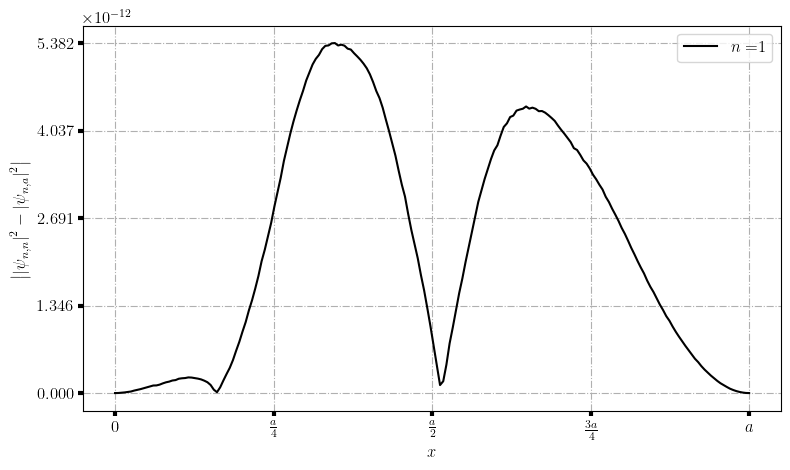

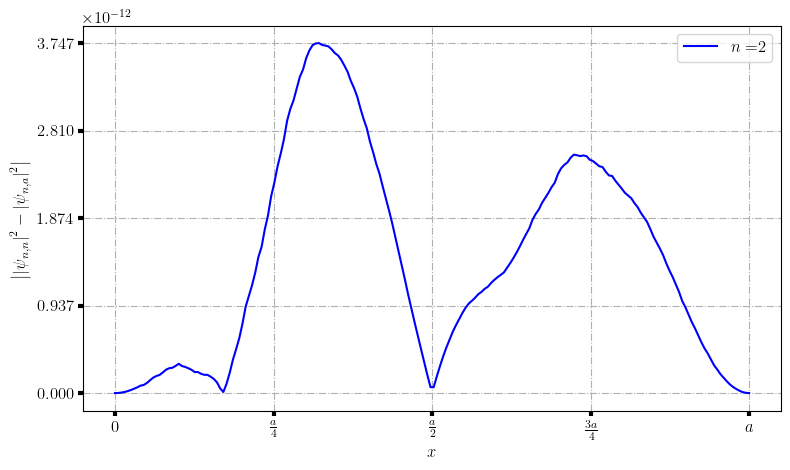

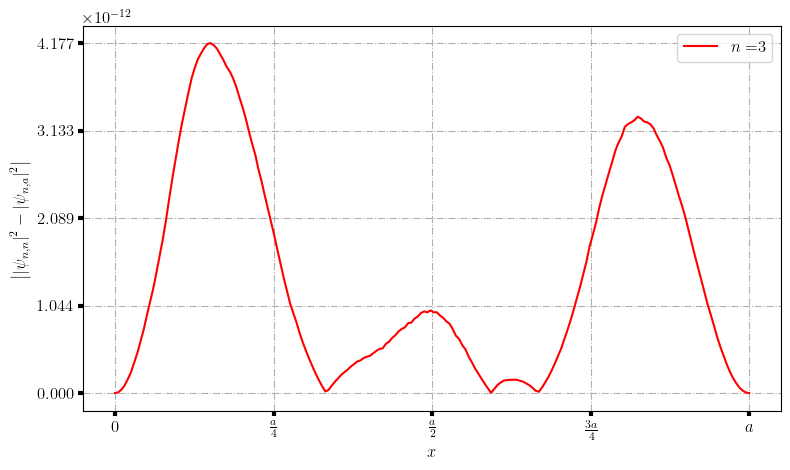

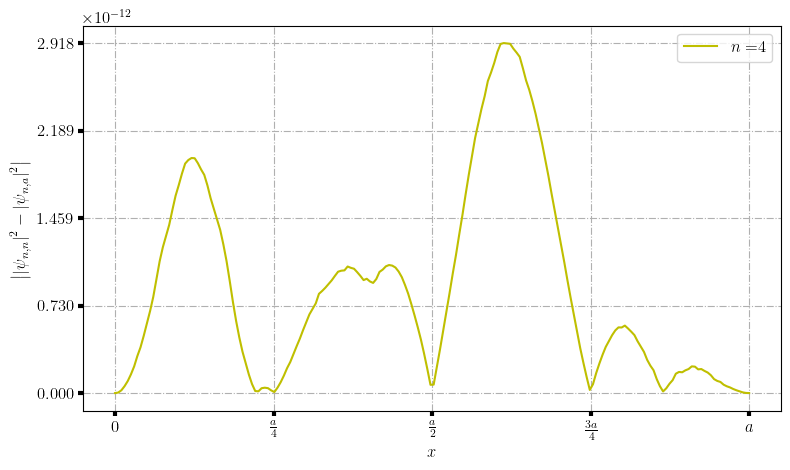

In [108]:

for the_solution in range(solution_N):

    set_size_inches_x = 9.0
    set_size_inches_y = 5.0
    file_name = f'comparison_analitic_num1_PsiSquared_{the_solution+1}.pdf'

    the_styles = ['-k','-b','-r','-y']

    number_of_ticks_x = 4
    number_of_ticks_y = 4

    graph_x_label = r'$x$'
    graph_y_label = r'$\left| \left| \psi_{n,n} \right|^2 - \left| \psi_{n,a} \right|^2 \right|$'

    # =============================================================================================================================

    fig, ax = plt.subplots()

    ax.plot(the_xs,np.abs(the_solutions_squared[the_solution,:]-the_ys_squared[the_solution]), the_styles[the_solution], label=r'$n=$'+str(the_solution+1))
    ax.legend(loc=1)

    my_xticks = [r'$0$', r'$\frac{a}{4}$', r'$\frac{a}{2}$', r'$\frac{3a}{4}$', r'$a$']
    my_xticks_values = [0.0,0.25*a,0.50*a,0.75*a,1.0*a]
    ax.set_xticks(my_xticks_values)
    ax.set_xticklabels(my_xticks)

    max_x_values = np.max(the_xs_num)
    min_x_values = np.min(the_xs_num)
    xticks_delta = ( max_x_values - min_x_values ) / number_of_ticks_x
    # ax.set_xticks(np.arange(min_x_values, max_x_values+xticks_delta, xticks_delta))

    max_y_values = np.max(np.abs(the_solutions_squared[the_solution,:]-the_ys_squared[the_solution]))
    min_y_values = np.min(np.abs(the_solutions_squared[the_solution,:]-the_ys_squared[the_solution]))
    yticks_delta = ( max_y_values - min_y_values ) / number_of_ticks_y
    ax.set_yticks(np.arange(min_y_values, max_y_values+yticks_delta, yticks_delta))

    range_x_values = max_x_values - min_x_values
    range_y_values = max_y_values - min_y_values

    # graph_title = 'Numerical'
    # ax.set_title(graph_title)
    ax.set_xlabel(graph_x_label)
    ax.set_ylabel(graph_y_label)

    ax.set_xlim(min_x_values-(range_x_values/20.0), max_x_values+(range_x_values/20.0))
    ax.set_ylim(min_y_values-(range_y_values/20.0), max_y_values+(range_y_values/20.0))

    ax.grid(True, linestyle='-.')
    ax.tick_params(labelcolor='k', labelsize='medium', width=3)

    fig.set_size_inches(set_size_inches_x, set_size_inches_y)
    fig.savefig(file_name,bbox_inches='tight', dpi = 100)

    plt.show()


In [109]:

the_kns_1

string_1 = 'n'.ljust(5)
string_2 = 'kn_analitical'.ljust(30)
string_3 = 'kn_num'.ljust(30)
string_4 = 'np.abs(kn_analitical-kn_num)'.ljust(30)
string_5 = 'kn_num1'.ljust(30)
string_6 = 'np.abs(kn_analitical-kn_num1)'.ljust(30)
print(f'|{string_1}|{string_2}|{string_3}|{string_4}|{string_5}|{string_6}|')

for the_solution in range(solution_N):

    kn_analitical = np.pi*(the_solution+1)/a
    kn_num = the_kns[the_solution]
    kn_num1 = the_kns_1[the_solution]

    string_1 = str(the_solution+1).ljust(5)
    string_2 = str(kn_analitical).ljust(30)
    string_3 = str(kn_num).ljust(30)
    string_4 = str(np.abs(kn_analitical-kn_num)).ljust(30)
    string_5 = str(kn_num1).ljust(30)
    string_6 = str(np.abs(kn_analitical-kn_num1)).ljust(30)
    print(f'|{string_1}|{string_2}|{string_3}|{string_4}|{string_5}|{string_6}|')


|n    |kn_analitical                 |kn_num                        |np.abs(kn_analitical-kn_num)  |kn_num1                       |np.abs(kn_analitical-kn_num1) |
|1    |3.141592653589793             |3.1414641278443765            |0.00012852574541666328        |3.1573467639301898            |0.015754110340396643          |
|2    |6.283185307179586             |6.282157137286065             |0.0010281698935212802         |6.314496805469202             |0.031311498289615436          |
|3    |9.42477796076938              |9.42130809026461              |0.0034698705047695455         |9.471253414651386             |0.04647545388200669           |
|4    |12.566370614359172            |12.55814640937099             |0.008224204988183104          |12.62741990592695             |0.06104929156777672           |


# References:



- Name of the book: Introduction to Quantum Mechanics
    - Author: David J. Griffiths
    - Edition: First edition
    - Publisher: Pearson College

- Name of the book: Numerical Analysis
    - Author: Richard L. Burden / J. Douglas Faires
    - Edition: NINTH EDITION
    - Publisher: Cengage Learning

- Name of the book: Cálculo Numérico: Aspectos Teóricos e Computacionais
    - Author: Márcia A. Gomes Ruggiero / Vera Lúcia Da Rocha Lopes
    - Edition: 2ª edição
    - Publisher: Pearson Universidades
    - Language: Portuguese

- Name of the video: Sturm-Liouville Problem and its Numerical Solution
    - Link of the video: https://youtu.be/5kcophHPl_8?si=jg5yix14WR1y4kz4
    - Name of the channel: PDE beginner
    - Link of the channel: https://www.youtube.com/@pdebeginner3031
